In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format='retina'


In [4]:
# Create a dataset with 3 features and 1000 samples for a classification problem

df = pd.DataFrame(np.random.randn(1000, 3), columns=['A', 'B', 'C'])
df['D'] = np.random.randint(0, 2, 1000)

df

,A,B,C,D
0,0.112981,-0.033889,0.348708,1
1,1.821601,1.267423,0.274915,1
2,0.148040,-1.412712,-0.271345,1
3,0.004766,-1.209944,0.122512,1
4,0.854442,-0.559497,-0.605376,1
...,...,...,...,...
995,0.161444,-0.969567,-2.079664,0
996,1.615938,0.219218,-0.322223,0
997,0.501970,-0.874313,1.571102,1
998,0.386063,-1.481215,-1.974313,1


In [5]:
X, y = df[['A', 'B', 'C']], df['D']

In [6]:
train_X, test_X = X[:800], X[800:]
train_y, test_y = y[:800], y[800:]


In [12]:
from sklearn.tree import DecisionTreeClassifier


In [15]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(train_X, train_y)


DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'X[0] <= -0.17\ngini = 0.5\nsamples = 800\nvalue = [400, 400]'),
 Text(0.25, 0.5, 'X[0] <= -0.307\ngini = 0.495\nsamples = 348\nvalue = [157, 191]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.499\nsamples = 316\nvalue = [153, 163]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.219\nsamples = 32\nvalue = [4, 28]'),
 Text(0.75, 0.5, 'X[2] <= 1.656\ngini = 0.497\nsamples = 452\nvalue = [243, 209]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.495\nsamples = 434\nvalue = [239, 195]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.346\nsamples = 18\nvalue = [4, 14]')]

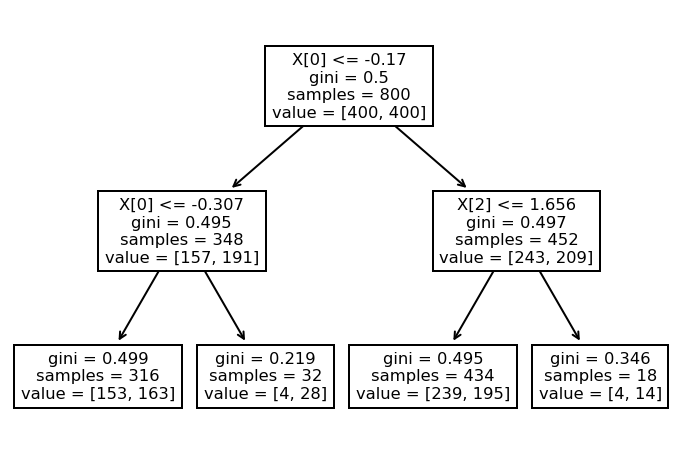

In [16]:
from sklearn import tree
tree.plot_tree(dt)

In [20]:
y_hat = dt.predict(test_X)
pd.DataFrame({"y_true": test_y, "y_hat": y_hat})


,y_true,y_hat
800,0,1
801,0,0
802,1,1
803,1,1
804,0,1
...,...,...
995,0,1
996,0,0
997,1,0
998,1,1


In [17]:
from sklearn.tree import DecisionTreeClassifier

train_scores = {}
test_scores = {}

for i in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(train_X, train_y)
    train_scores[i] = dt.score(train_X, train_y)
    
    test_scores[i] = dt.score(test_X, test_y)


<AxesSubplot:>

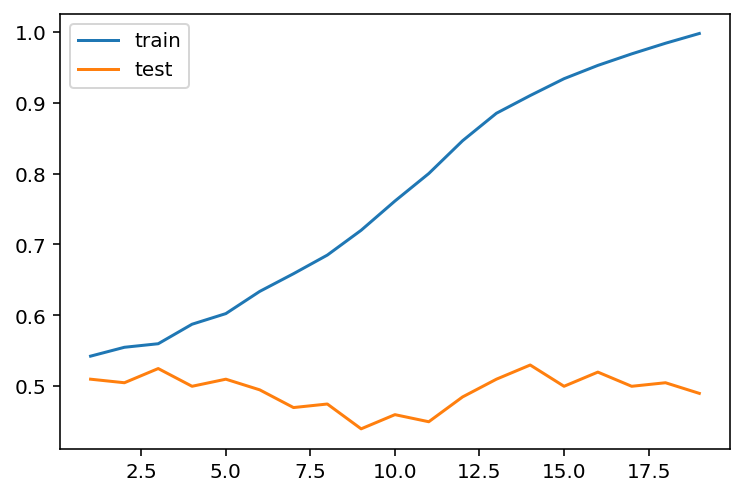

In [18]:
scores_df = pd.DataFrame({'train': train_scores, 'test': test_scores})
scores_df.plot()